# Digits Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline
digits = load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
n_samples, n_features = digits.data.shape
print (n_samples, n_features)

1797 64


In [4]:
print(digits.data[0])
print(digits.target)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[0 1 2 ..., 8 9 8]


The target here is just the digit represented by the data. The data is an array of length 64... but what does this data mean?

There's a clue in the fact that we have two versions of the data array: data and images. Let's take a look at them:

In [5]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


In [6]:
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Aside... numpy and memory efficiency:
You might wonder whether duplicating the data is a problem. In this case, the memory overhead is very small. Even though the arrays are different shapes, they point to the same memory block, which we can see by doing a bit of digging into the guts of numpy:

In [7]:
print(digits.data.__array_interface__['data'])
print(digits.images.__array_interface__['data'])

(3037507218976, False)
(3037507218976, False)


The long integer here is a memory address: the fact that the two are the same tells us that the two arrays simply views of the same underlying data.

Let's visualize the data. It's little bit more involved than the simple scatter-plot we used above, but we can do it rather tersely.

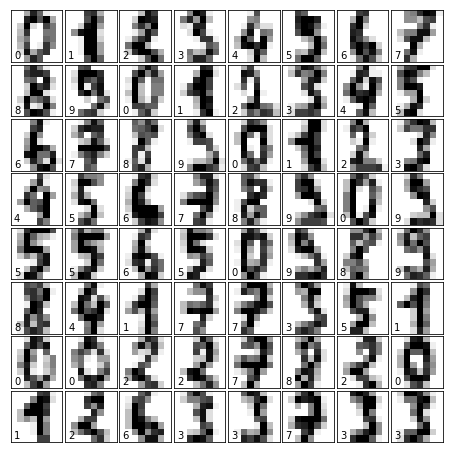

In [8]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))